In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
from plotly.subplots import make_subplots
from scipy import stats
from datetime import date,datetime
from util import date_diff
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [97]:
df = pd.read_excel('../site_info_ver_5.xlsx')

In [98]:
sites = df.Site_Name.unique()

In [4]:
df.columns

Index(['Model_number', 'Date', 'Site_Name', 'Israelis_Count', 'Tourists_Count',
       'Total', 'region_Central', 'region_Judea_Samaria', 'region_North',
       'region_South', 'is_weekend', 'operations', 'is_jewish_holiday',
       'is_jewish_vacation', 'is_muslims_holiday', 'is_muslims_vacation',
       'is_camping', 'special_activity', 'visit_duration', 'is_jewishHeritage',
       'is_muslimsHeritage', 'is_christiansHeritage', 'is_nationalPark',
       'is_natureReserve', 'is_archaeology', 'is_religion', 'is_animals',
       'is_heritage', 'is_water', 'is_cave', 'is_lookout', 'pm10', 'pm2.5',
       'nox', 'so2', 'Temperature', 'is_HeatWave', 'Tel_Aviv-Yafo_pm10',
       'Jerusalem_pm10', 'Haifa_pm10', 'Ashkelon_pm10', 'Beer-Sheva_pm10',
       'Tel_Aviv-Yafo_pm2.5', 'Jerusalem_pm2.5', 'Haifa_pm2.5',
       'Ashkelon_pm2.5', 'Beer-Sheva_pm2.5', 'Tel_Aviv-Yafo_nox',
       'Jerusalem_nox', 'Haifa_nox', 'Ashkelon_nox', 'Beer-Sheva_nox',
       'Tel_Aviv-Yafo_so2', 'Jerusalem_so2', 'Ha

In [5]:
vars = ['is_Site_exceeded_pm10', 'is_Site_exceeded_pm2.5',
       'is_Site_exceeded_nox', 'is_Site_exceeded_so2']

exceeded_pm2 = []
exceeded_pm10 = []
exceeded_nox = []
exceeded_so2 = []

not_exceeded_pm2 = []
not_exceeded_pm10 = []
not_exceeded_nox = []
not_exceeded_so2 = []


In [6]:
israelis_exceeded_pm2 = []
israelis_exceeded_pm10 = []
israelis_exceeded_nox = []
israelis_exceeded_so2 = []

israelis_not_exceeded_pm2 = []
israelis_not_exceeded_pm10 = []
israelis_not_exceeded_nox = []
israelis_not_exceeded_so2 = []

tourists_exceeded_pm2 = []
tourists_exceeded_pm10 = []
tourists_exceeded_nox = []
tourists_exceeded_so2 = []

tourists_not_exceeded_pm2 = []
tourists_not_exceeded_pm10 = []
tourists_not_exceeded_nox = []
tourists_not_exceeded_so2 = []

In [116]:
total_col = 3
pm10 = 4
pm2 = 5
nox = 6
so2 = 7
israelis = 1
tourists = 2

In [124]:
df.iloc[1,pm10]==1 and df.iloc[0,pm10]==0

False

In [121]:
def test(tmp):
    for i in range(1,tmp.shape[0]-1):
        print(i)
        if tmp.iloc[i,pm10]==1 and tmp.iloc[i-1,pm10]==0: # 4 -> is_Site_exceeded_pm10
            res = tmp.iloc[i-1:i+1,pm10].sum() #check prev day that all 0's -> no pollution caused by pm10
            delta0 = date_diff(tmp.iloc[i+1,0],tmp.iloc[i,0],1)
            #delta1 = date_diff(tmp.iloc[i-1,0] , tmp.iloc[i,0],1)
            if res == 1 and delta0: 
                exceeded_pm10.append(tmp.iloc[i,total_col])
                not_exceeded_pm10.append(tmp.iloc[i-1,total_col])
                israelis_exceeded_pm10.append(tmp.iloc[i,israelis])
                israelis_not_exceeded_pm10.append(tmp.iloc[i-1,israelis])
                tourists_exceeded_pm10.append(tmp.iloc[i,tourists])
                tourists_not_exceeded_pm10.append(tmp.iloc[i-1,tourists])

        if tmp.iloc[i,pm2]==1 and tmp.iloc[i-1,pm2]==0: # 4 -> is_Site_exceeded_pm2.5
            res = tmp.iloc[i-1:i+1,pm2].sum() #check prev day that all 0's -> no pollution by pm2.5
            #delta0 = date_diff(tmp.iloc[i+1,0],tmp.iloc[i,0],1)
            delta1 = date_diff(tmp.iloc[i-1,0] , tmp.iloc[i,0],1)
            if res == 1 and delta1: 
                exceeded_pm2.append(tmp.iloc[i,total_col])
                not_exceeded_pm2.append(tmp.iloc[i-1,total_col])
                israelis_exceeded_pm2.append(tmp.iloc[i,israelis])
                israelis_not_exceeded_pm2.append(tmp.iloc[i-1,israelis])
                tourists_exceeded_pm2.append(tmp.iloc[i,tourists])
                tourists_not_exceeded_pm2.append(tmp.iloc[i-1,tourists])

        if tmp.iloc[i,nox]==1 and tmp.iloc[i-1,nox]==0: # 4 -> is_Site_exceeded_nox
            res = tmp.iloc[i-1:i+1,nox].sum() #check prev day that all 0's -> no pollution by nox
            delta0 = date_diff(tmp.iloc[i-1,0],tmp.iloc[i,0],1)
            #delta1 = date_diff(tmp.iloc[i-1,0] , tmp.iloc[i-8,0],1)
            if res == 1 and delta0: 
                exceeded_nox.append(tmp.iloc[i,total_col])
                not_exceeded_nox.append(tmp.iloc[i-1,total_col])
                israelis_exceeded_nox.append(tmp.iloc[i,israelis])
                israelis_not_exceeded_nox.append(tmp.iloc[i-1,israelis])
                tourists_exceeded_nox.append(tmp.iloc[i,tourists])
                tourists_not_exceeded_nox.append(tmp.iloc[i-1,tourists])

        if tmp.iloc[i,so2]==1 and tmp.iloc[i-1,so2]==0: # 4 -> is_Site_exceeded_nox
            res = tmp.iloc[i-1:i+1,so2].sum() #check prev day that all 0's -> no pollution by nox
            delta0 = date_diff(tmp.iloc[i-1,0],tmp.iloc[i,0],1)
            #delta1 = date_diff(tmp.iloc[i-1,0] , tmp.iloc[i-8,0],1)
            if res == 1 and delta0: 
                exceeded_so2.append(tmp.iloc[i,total_col])
                not_exceeded_so2.append(tmp.iloc[i-1,total_col])
                israelis_exceeded_so2.append(tmp.iloc[i,israelis])
                israelis_not_exceeded_so2.append(tmp.iloc[i-1,israelis])
                tourists_exceeded_so2.append(tmp.iloc[i,tourists])
                tourists_not_exceeded_nox.append(tmp.iloc[i-1,tourists])
                

        


In [9]:
for site in sites:
    tmp = df[df.Site_Name == site]

    tmp = tmp[['Date','Israelis_Count','Tourists_Count','Total','is_Site_exceeded_pm10', 'is_Site_exceeded_pm2.5',
       'is_Site_exceeded_nox', 'is_Site_exceeded_so2']].reset_index(drop = True)

    #to_scale = tmp[['Israelis_Count','Tourists_Count','Total']]
    #tmp[['Israelis_Count','Tourists_Count','Total']] = scaler.fit_transform(tmp[['Israelis_Count','Tourists_Count','Total']])
    test(tmp)

In [11]:
#check pm10
stat, p = stats.wilcoxon(not_exceeded_pm10,exceeded_pm10,zero_method='wilcox',alternative="greater")

if p < 0.05:
     print("There was a difference: reject H0 v",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=not_exceeded_pm10,
    histnorm='percent',
    name='PM10 No exceeded', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=0.0,
        end=20.0,
        size=0.5
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=exceeded_pm10,
    histnorm='percent',
    name='PM10 exceeded',
    xbins=dict(
        start=0.0,
        end=20,
        size=0.5
    ),
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    title_text='Sampled Results', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

There was no difference: accept H0  0.08224212405165293


In [24]:
#check pm2.5
stat, p = stats.wilcoxon(not_exceeded_pm2,exceeded_pm2,zero_method='wilcox',alternative="greater")

if p < 0.05:
     print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was no difference: accept H0  0.9262923020132126


In [25]:
#check nox
stat, p = stats.wilcoxon(not_exceeded_nox,exceeded_nox,zero_method='wilcox',alternative="greater")

if p < 0.05:
    # print("There was a difference: reject H0 ",str(p))
    print("There is a difference: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was no difference: accept H0  0.8930425976258602


In [26]:
#check so2
stat, p = stats.wilcoxon(not_exceeded_so2,exceeded_so2,zero_method='wilcox',alternative="greater")

if p < 0.05:
    # print("There was a difference: reject H0 ",str(p))
    print("There is a difference: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was no difference: accept H0  0.9309451416882902


In [27]:
#check pm10 israelis
stat, p = stats.wilcoxon(israelis_not_exceeded_pm10,israelis_exceeded_pm10,zero_method='wilcox',alternative="greater")

if p < 0.05:
     print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was no difference: accept H0  0.35330525090731435


In [28]:
#check pm2.5 israelis
stat, p = stats.wilcoxon(israelis_not_exceeded_pm2,israelis_exceeded_pm2,zero_method='wilcox',alternative="less")

if p < 0.05:
     print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was a difference: reject H0  0.023368755267326534


In [29]:
#check nox israelis
stat, p = stats.wilcoxon(israelis_exceeded_nox,israelis_not_exceeded_nox,zero_method='wilcox',alternative="greater")

if p < 0.05:
     print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was a difference: reject H0  0.013129079038893939


In [30]:
#check so2 israelis
stat, p = stats.wilcoxon(israelis_not_exceeded_so2,israelis_exceeded_so2,zero_method='wilcox',alternative="greater")

if p < 0.05:
     print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was no difference: accept H0  0.8566884716568006


In [31]:
#check pm10 tourists
stat, p = stats.wilcoxon(tourists_not_exceeded_pm10,tourists_exceeded_pm10,zero_method='wilcox',alternative="greater")

if p < 0.05:
     print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was no difference: accept H0  0.06639192353099803


In [21]:
#check pm2.5 tourists
stat, p = stats.wilcoxon(tourists_not_exceeded_pm2,tourists_exceeded_pm2,zero_method='wilcox',alternative="greater")

if p < 0.05:
     print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was no difference: accept H0  0.3283177772811855


In [22]:
len(tourists_exceeded_nox)

13031

In [ ]:
#check nox tourists
# stat, p = stats.wilcoxon(tourists_not_exceeded_nox,tourists_exceeded_nox,zero_method='wilcox',alternative="greater")

# if p < 0.05:
#      print("There was a difference: reject H0 ",str(p))
#     #print("No heat Wave is Greater: reject H0 ",str(p))
# else: print("There was no difference: accept H0 ",str(p))

In [34]:
#check so2 tourists
# stat, p = stats.wilcoxon(tourists_not_exceeded_so2,tourists_exceeded_so2,zero_method='wilcox',alternative="greater")

# if p < 0.05:
#      print("There was a difference: reject H0 ",str(p))
#     #print("No heat Wave is Greater: reject H0 ",str(p))
# else: print("There was no difference: accept H0 ",str(p))

In [35]:
central_tel_aviv_pm10 = list(df.loc[(df['Tel_Aviv-Yafo_pm10_exceeded'] == 1) & (df['region_Central']==1)]['Total'])
central_tel_aviv_pm10_no = list(df.loc[(df['Tel_Aviv-Yafo_pm10_exceeded'] == 0) & (df['region_Central']==1)]['Total'])

central_tel_aviv_nox = list(df.loc[(df['Tel_Aviv-Yafo_nox_exceeded'] == 1) & (df['region_Central']==1)]['Total'])
central_tel_aviv_nox_no = list(df.loc[(df['Tel_Aviv-Yafo_nox_exceeded'] == 0) & (df['region_Central']==1)]['Total'])

central_tel_aviv_pm2 = list(df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 1) & (df['region_Central']==1)]['Total'])
central_tel_aviv_pm2_no = list(df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 0) & (df['region_Central']==1)]['Total'])

central_tel_aviv_so2 = list(df.loc[(df['Tel_Aviv-Yafo_so2_exceeded'] == 1) & (df['region_Central']==1)]['Total'])
central_tel_aviv_so2_no = list(df.loc[(df['Tel_Aviv-Yafo_so2_exceeded'] == 0) & (df['region_Central']==1)]['Total'])

In [46]:
stat, p = stats.mannwhitneyu(central_tel_aviv_pm2,central_tel_aviv_pm2_no,alternative="greater")

if p < 0.05:
    print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

There was a difference: reject H0  0.0005035529101004285


In [38]:
tel_aviv_pm10 = list(df.loc[(df['Tel_Aviv-Yafo_pm10_exceeded'] == 1) & (df['region_North']==1) & (df['Date']<datetime(2017,2,1))]['Total'])
tel_aviv_pm10_no = list(df.loc[(df['Tel_Aviv-Yafo_pm10_exceeded'] == 0) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])

tel_aviv_nox = list(df.loc[(df['Tel_Aviv-Yafo_nox_exceeded'] == 1) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])
tel_aviv_nox_no = list(df.loc[(df['Tel_Aviv-Yafo_nox_exceeded'] == 0) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])

tel_aviv_pm2 = list(df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 1) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])
tel_aviv_pm2_no = list(df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 0) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])

tel_aviv_so2 = list(df.loc[(df['Tel_Aviv-Yafo_so2_exceeded'] == 1) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])
tel_aviv_so2_no = list(df.loc[(df['Tel_Aviv-Yafo_so2_exceeded'] == 0) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])

There was a difference: reject H0  3.608213091016432e-06


<AxesSubplot:xlabel='Date', ylabel='Total'>

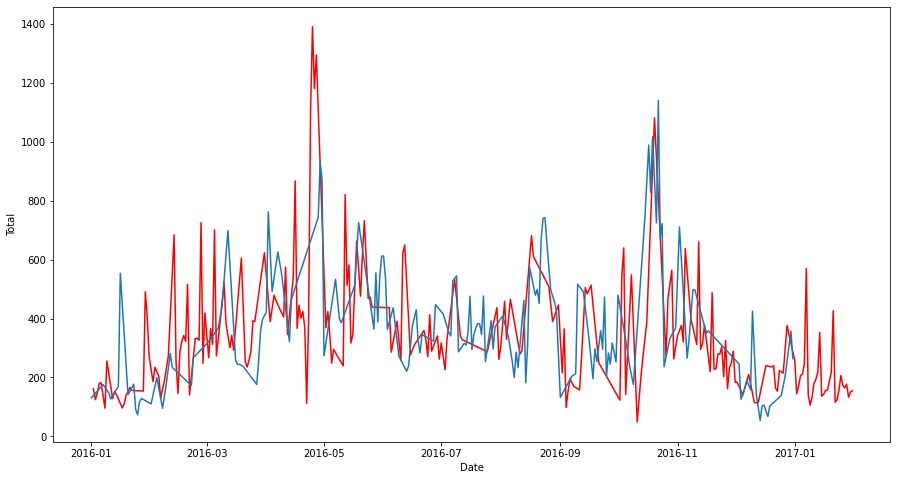

In [39]:
stat, p = stats.mannwhitneyu(tel_aviv_pm2,tel_aviv_pm2_no,alternative="less")

if p < 0.05:
    print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

yes = df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 1) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))][['Date','Total']]
no = df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 0) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))][['Date','Total']]

plt.figure(figsize = (15,8))
sns.lineplot(x = 'Date', y = 'Total',data = yes,color='red',ci=None)

sns.lineplot(x = 'Date', y = 'Total',data = no,ci=None)


In [49]:
tel_aviv_pm10 = list(df.loc[(df['Tel_Aviv-Yafo_pm10_exceeded'] == 1) & (df['region_North']==1) & (df['Date']>=datetime(2016,2,1)) & (df['Date']<datetime(2019,2,1))]['Total'])
tel_aviv_pm10_no = list(df.loc[(df['Tel_Aviv-Yafo_pm10_exceeded'] == 0) & (df['region_North']==1)& (df['Date']>=datetime(2016,2,1)) & (df['Date']<datetime(2019,2,1))]['Total'])

tel_aviv_pm2 = list(df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 1) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])
tel_aviv_pm2_no = list(df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 0) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])


In [ ]:
stat, p = stats.mannwhitneyu(tel_aviv_pm2,tel_aviv_pm2_no,alternative="less")

if p < 0.05:
    print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

In [57]:
south_tel_aviv_pm10 = list(df.loc[(df['Tel_Aviv-Yafo_pm10_exceeded'] == 1) & (df['region_South']==1) & (df['Date']<datetime(2017,2,1))]['Total'])
south_tel_aviv_pm10_no = list(df.loc[(df['Tel_Aviv-Yafo_pm10_exceeded'] == 0) & (df['region_South']==1)& (df['Date']<datetime(2017,2,1))] ['Total'])

south_tel_aviv_pm2 = list(df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 1) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])
south_tel_aviv_pm2_no = list(df.loc[(df['Tel_Aviv-Yafo_pm2.5_exceeded'] == 0) & (df['region_North']==1)& (df['Date']<datetime(2017,2,1))]['Total'])



In [ ]:
for site in sites:
    tmp = df[(df.Site_Name == site) & (df.region_South == 1) & (df.is_jewish_holiday == 0) & (df.operations == 0)]

    tmp = tmp[['Date','Israelis_Count','Tourists_Count','Total','is_Site_exceeded_pm10', 'is_Site_exceeded_pm2.5',
       'is_Site_exceeded_nox', 'is_Site_exceeded_so2']].reset_index(drop = True)

    test(tmp)

In [103]:
stat, p = stats.wilcoxon(not_exceeded_pm10,exceeded_pm10,alternative="greater")


if p < 0.05:
    print("There was a difference: reject H0 ",str(p))
    
else: print("There was no difference: accept H0 ",str(p))

# p-val = 0.002
#when there was no pm10 pollution in the northern sites , there were more visitors

There was a difference: reject H0  0.002085923820451555


In [105]:
stat, p = stats.wilcoxon(not_exceeded_pm10,exceeded_pm10,alternative="greater")

if p < 0.05:
    print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

# p-val = 0.001
#when there was no pm10 pollution in the southern sites , there were more visitors

There was a difference: reject H0  0.0014162534618774648


In [101]:
stat, p = stats.wilcoxon(not_exceeded_pm10,exceeded_pm10,alternative="greater")

if p < 0.05:
    print("There was a difference: reject H0 ",str(p))
    #print("No heat Wave is Greater: reject H0 ",str(p))
else: print("There was no difference: accept H0 ",str(p))

# p-val = 0.004
#when there was no pm10 pollution in the central sites , there were more visitors

There was a difference: reject H0  0.004224733390994819
